**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(UpSetR)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = "region.annotation.fcc_starrmpra_junke.group.label.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpra_junke.group.label.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpra_junke.group.label.tsv 


## Import data

In [4]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.fcc_starrmpra_junke.group.label.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_fcc_starrmpra_group_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150047      9

$fcc_astarr_macs_input_union
[1] 246862      9



Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group
chr1,10038,10405,chr1:10038-10405,18966,Distal,0,Inactive,Distal:Inactive
chr1,14282,14614,chr1:14282-14614,14757,Distal,0,Inactive,Distal:Inactive
chr1,16025,16338,chr1:16025-16338,13033,Distal,0,Inactive,Distal:Inactive


## Explore: Count table

In [5]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import
lst = lapply(lst, function(dat){
    res = table(dat$Group, dnn=c("Group"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Group, Freq)
fun_display_table(dat)

Region,Distal:Active,Distal:Inactive,Distal:Repressive,Proximal:Active,Proximal:Inactive,Proximal:Repressive
fcc_astarr_macs_input_overlap,11435,125183,1613,5162,6518,136
fcc_astarr_macs_input_union,12290,219703,2725,5145,6856,143


In [6]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import
lst = lapply(lst, function(dat){
    res = table(dat$Group, dnn=c("Group"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% dplyr::filter(!str_detect(Group, "Inactive"))
dat = dat %>% dplyr::mutate(Region = fun_str_map_atac(Region))
dat = dat %>% dplyr::mutate(Freq   = scales::comma(Freq))
dat = dat %>% tidyr::spread(Region, Freq)
#fun_display_table(dat)
dat %>% kableExtra::kable("markdown")



|Group               |ATAC (Overlap) |ATAC (Union) |
|:-------------------|:--------------|:------------|
|Distal:Active       |11,435         |12,290       |
|Distal:Repressive   |1,613          |2,725        |
|Proximal:Active     |5,162          |5,145        |
|Proximal:Repressive |136            |143          |

In [7]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import

dat = lst[[1]]
res = table(dat$Group, dnn=c("Group"))
dat = as.data.frame(res)
colnames(dat) = c("Group", "Count")
dat = dat %>% 
    dplyr::filter(!str_detect(Group, "Inactive")) %>%
    dplyr::mutate(Count = scales::comma(Count))

#fun_display_table(dat)
dat %>% kableExtra::kable("markdown")



|Group               |Count  |
|:-------------------|:------|
|Distal:Active       |11,435 |
|Distal:Repressive   |1,613  |
|Proximal:Active     |5,162  |
|Proximal:Repressive |136    |

## Explore: bar plot

In [8]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

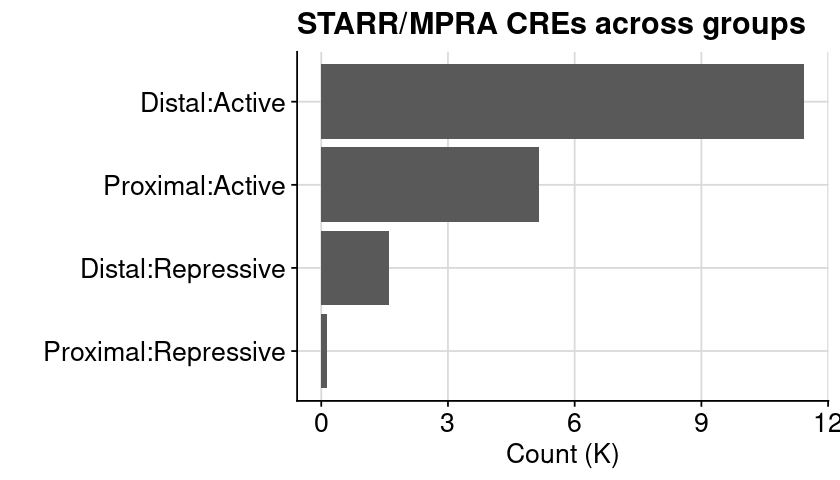

In [9]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import
dat = lst[[1]]
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()

dat = as.data.frame(table(dat$Group))
colnames(dat) = c("Group", "Count")
dat = dat %>% dplyr::filter(!str_detect(Group, "Inactive"))

vec = c("Distal:Active", "Proximal:Active", "Distal:Repressive", "Proximal:Repressive")
dat = dat %>% dplyr::mutate(Group = factor(Group, levels=rev(vec)))

gpt = ggplot(dat, aes(x=Count/1000, y = Group)) + 
    geom_col() +
    theme_cowplot() +
    background_grid() +
    labs(x = "Count (K)", y = "", title = "STARR/MPRA CREs across groups") +
    theme_text

### assign and show
gpt_export_bar_count = gpt
options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

**Save plots**

In [10]:
plt_export = gpt_export_bar_count
txt_export = "fig.region_annot.astarr_input_overlap.fcc_starrmpra_vote2.barplot.count.group"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

## Explore: Region Overlap

In [11]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import
dat = lst[[1]]
dat = dat %>% dplyr::filter(!str_detect(Group, "Inactive"))
vec = unique(dat$Region)
length(vec)

[1] 18341

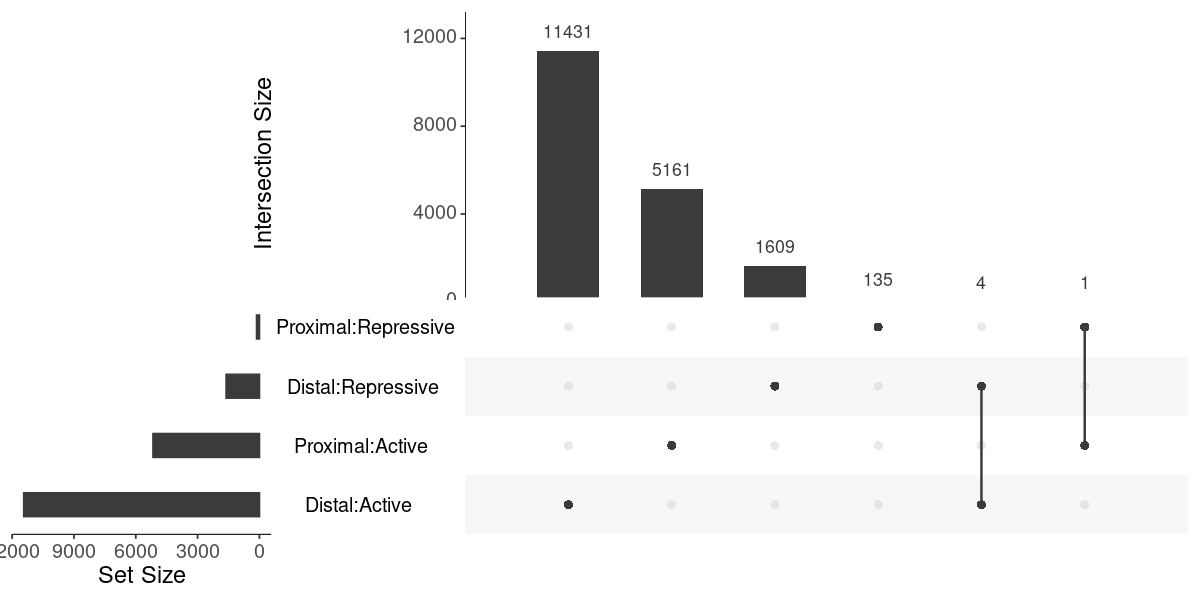

In [12]:
lst = lst_dat_region_annot_fcc_starrmpra_group_import
dat = lst[[1]]
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
dat = dat %>% dplyr::filter(!str_detect(Group, "Inactive"))
lst = split(dat$Region, dat$Group)

plt = upset(
    fromList(lst), 
    order.by = "freq", 
    mb.ratio = c(0.5, 0.5),
    text.scale=1.7
)

### assign and show
plt_export_upset_group = plt
options(repr.plot.height=5, repr.plot.width=10)
print(plt)

**Save plots**

In [13]:
plt_export = plt_export_upset_group
txt_export = "fig.region_annot.astarr_input_overlap.fcc_starrmpra_vote2.upset.group"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

png(txt_fpath, height = 5, width = 10, units = "in", res = 300)
print(plt_export)
dev.off()

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

svg(txt_fpath, height = 5, width = 10)
print(plt_export)
dev.off()

pdf 
  2

pdf 
  2